**Arrays, Tuples, Ranges, and Other Fundamental Types**

[Quant Econ](https://julia.quantecon.org/getting_started_julia/fundamental_types.html)

May 20th 2020

Taisei Noda

* Setup

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.6.0")
# uncomment to force package installation and precompilation

Activated /Users/taisei/Project.toml
Info quantecon-notebooks-julia 0.5.0 activated, 0.6.0 requested


In [16]:
using LinearAlgebra, Statistics

# Array Basics

## Shape and Dimension

* Example of arrays

In [3]:
a = [10, 20, 30]

3-element Array{Int64,1}:
 10
 20
 30

In [4]:
a = [1.0, 2.0, 3.0]

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

In [5]:
typeof(randn(100))

Array{Float64,1}

In [6]:
ndims(a)

1

In [7]:
size(a)

(3,)

* One dimentional arrays = vectors

* Two dimentional arrays = matrix

In [9]:
fill(5.0, 2, 2)

2×2 Array{Float64,2}:
 5.0  5.0
 5.0  5.0

In [10]:
x = Array{Float64}(undef, 2, 2)

2×2 Array{Float64,2}:
 2.2399e-314   2.28629e-314
 2.28629e-314  2.25494e-314

Note: this is an empty array

* Rewrite existing arrays

* Copy()

In [13]:
x = [1, 2, 3]
y = copy(x)
y[1] = 2
x,y

([1, 2, 3], [2, 2, 3])

* similar()

In [15]:
x = [1, 2, 3]
y = similar(x,4)
y

4-element Array{Int64,1}:
 4573270616
 4572959072
 4572392000
 4684860848

In [22]:
a = [10, 20, 30, 40]
b = [10 20 30 40] # two dimensional
println(typeof(a),typeof(b))

Array{Int64,1}Array{Int64,2}


In [25]:
ndims(b)

2

In [23]:
a =[10 20;30 40]

2×2 Array{Int64,2}:
 10  20
 30  40

## Array Indexing

In [24]:
a = [10;20;30;40]
ndims(a)

1

In [27]:
a = randn(2,2)

2×2 Array{Float64,2}:
 -0.636296  2.19925
 -0.735761  0.718596

In [28]:
a[1,:]# first row

2-element Array{Float64,1}:
 -0.6362962385620883
  2.1992539865402345

In [29]:
a[:,1] # first column

2-element Array{Float64,1}:
 -0.6362962385620883
 -0.7357606610084996

In [30]:
b = [true false; false true]

2×2 Array{Bool,2}:
 1  0
 0  1

In [31]:
a[b]

2-element Array{Float64,1}:
 -0.6362962385620883
  0.7185956402722447

Note: we will use this operation for conditional extraction.

## Views and Slices

Using the ":" notation provides a slice of an array, copying the sub-array to a new array with a similar type.

In [36]:
a = [1 2; 3 4]
b = a[:, 2]
@show b
a[:, 2] = [4, 5] # modify a
@show a
@show b;

b = [2, 4]
a = [1 4; 3 5]
b = [2, 4]


* @views

In [37]:
a = [1 2; 3 4]
@views b = a[:, 2]
@show b
a[:, 2] = [4, 5]
@show a
@show b;

b = [2, 4]
a = [1 4; 3 5]
b = [4, 5]


"views" does not copy the value. It updates any modification even after the call.

Note: Do not rely on @views very much.

## Spatial Matrices

In [38]:
d = [1.0,2.0]
a = Diagonal(d)

2×2 Diagonal{Float64,Array{Float64,1}}:
 1.0   ⋅ 
  ⋅   2.0

In [39]:
b = [1.0 2.0; 3.0 4.0]
b - Diagonal([1.0, 1.0])  # poor style, inefficient code

2×2 Array{Float64,2}:
 0.0  2.0
 3.0  3.0

* Recommended (Use "I")

In [42]:
b = [1.0 2.0; 3.0 4.0]
b - I  # good style, and note the lack of dimensions of I

2×2 Array{Float64,2}:
 0.0  2.0
 3.0  3.0

In [41]:
typeof(I)

UniformScaling{Bool}

## Assignment and Passing Arrays

In [43]:
x = [1 2 3]
y = x  # name `y` binds to whatever value `x` bound to

1×3 Array{Int64,2}:
 1  2  3

In [44]:
x = [1 2 3]
y = x        # name `y` binds to whatever `x` bound to
z = [2 3 4]
y = z        # only changes name binding, not value!
@show (x, y, z);

(x, y, z) = ([1 2 3], [2 3 4], [2 3 4])


In [45]:
x = [1 2 3]
y = x       # name `y` binds to whatever `x` bound to
z = [2 3 4]
y .= z      # now dispatches the assignment of each element
@show (x, y, z);

(x, y, z) = ([2 3 4], [2 3 4], [2 3 4])


* y=z vs y.= z

y.=z makes change in x if y is defined by x.

**Out-of-place functions are preferred to "in-place" functions**

The mapped value is placed out of the function.

In [46]:
function f(x)
    return [1 2; 3 4] * x  # matrix * column vector
end

val = [1, 2]
f(val)

2-element Array{Int64,1}:
  5
 11

* Example of in place functions

In [47]:
function f(x)
    return [1 2; 3 4] * x # matrix * column vector
end

val = [1, 2]
y = similar(val)

function f!(out, x)
    out .= [1 2; 3 4] * x
end

f!(y, val)
y

2-element Array{Int64,1}:
  5
 11

* "!":modify any of the arguments have the name ending with !

* Common mistake

**???**

In [1]:
function f(x)
    return [1 2; 3 4] * x  # matrix * column vector
end

val = [1, 2]
y = similar(val)

function f!(out, x)
    out = [1 2; 3 4] * x   # MISTAKE! Should be .= or [:]
end
f!(y, val)
y

2-element Array{Int64,1}:
 8704
    6

## In-place and Immutable Types

* Scalars are always immutable. They are not modified.

In [3]:
y = [1 2]
y .-= 2    # y .= y .- 2, no problem


1×2 Array{Int64,2}:
 -1  0

element wise substraction

In [5]:
x = 5
#x .-= 2  # Fails!
x -=2

3

In [6]:
x = 2

function f(x)
    x = 3     # MISTAKE! does not modify x, creates a new value!
end

f(x)          # cannot modify immutables in place
@show x;

x = 2


In [8]:
using StaticArrays
xdynamic = [1, 2]
xstatic = @SVector [1, 2]  # turns it into a highly optimized static vector

f(x) = 2x
@show f(xdynamic)
@show f(xstatic)

# inplace version
function g(x)
    x .= 2x
    return "Success!"
end
@show xdynamic
@show g(xdynamic)
@show xdynamic;
@show g(xstatic)
# g(xstatic) # fails, static vectors are immutable

f(xdynamic) = [2, 4]
f(xstatic) = [2, 4]
xdynamic = [1, 2]
g(xdynamic) = "Success!"
xdynamic = [2, 4]


ErrorException: setindex!(::SArray{Tuple{2},Int64,1,2}, value, ::Int) is not defined.

**Note** : .= is not applicable for static vectors. 

# Operations on Arrays

## Array Methods

In [17]:
a = [-1, 0, 1]


@show length(a)
@show sum(a)
@show mean(a)
@show std(a)      # standard deviation
@show var(a)      # variance
@show maximum(a)
@show minimum(a)
@show extrema(a)  # (mimimum(a), maximum(a))

length(a) = 3
sum(a) = 0
mean(a) = 0.0
std(a) = 1.0
var(a) = 1.0
maximum(a) = 1
minimum(a) = -1
extrema(a) = (-1, 1)


(-1, 1)

In [22]:
b = sort(a, rev = true)  # returns new array, original not modified

3-element Array{Int64,1}:
  1
  0
 -1

In [20]:
a

3-element Array{Int64,1}:
 -1
  0
  1

In [23]:
b = sort!(a, rev = true)

3-element Array{Int64,1}:
  1
  0
 -1

In [24]:
b ==a

true

In [25]:
b===a

true

## Matrix Algebra

* Inverse "\" is preferred to inv(). Faster and more stable.

In [26]:
a = ones(1,2)
b = ones(2,2)
b*a'

2×1 Array{Float64,2}:
 2.0
 2.0

In [28]:
A = [1 2; 2 3]
B = ones(2,2)

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

 $AX=B$ ,or $X=A^{-1}B$

In [30]:
@time begin
    A\B
end

  0.000027 seconds (4 allocations: 352 bytes)


2×2 Array{Float64,2}:
 -1.0  -1.0
  1.0   1.0

In [31]:
@time begin
    inv(A)*B
end

  0.088333 seconds (209.66 k allocations: 10.903 MiB)


2×2 Array{Float64,2}:
 -1.0  -1.0
  1.0   1.0

* Inner product of two one dimensional vectors

In [32]:
dot(ones(2),ones(2))

2.0

## Elementwise Operations

In [33]:
ones(2, 2) .* ones(2, 2)   # element by element multiplication

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

In [34]:
A = -ones(2,2)

2×2 Array{Float64,2}:
 -1.0  -1.0
 -1.0  -1.0

In [35]:
A.^2

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

* Unlike MATLAB, scalar addition requires ".+"

In [36]:
x = [1, 2]
x .+ 1     # not x + 1

2-element Array{Int64,1}:
 2
 3

* Conditional extraction

In [38]:
a = randn(4)

4-element Array{Float64,1}:
  0.13446952833978587
 -0.15021322658749064
 -0.4031099319270369
  0.8112192622572086

In [39]:
a.<0

4-element BitArray{1}:
 0
 1
 1
 0

In [40]:
b=a[a.<0]
b

2-element Array{Float64,1}:
 -0.15021322658749064
 -0.4031099319270369

* Changing Dimensions

In [44]:
a = [10,20,30,40]
b=reshape(a,2,2)

2×2 Array{Int64,2}:
 10  30
 20  40

In [45]:
b[1,1]=100
b

2×2 Array{Int64,2}:
 100  30
  20  40

In [46]:
a

4-element Array{Int64,1}:
 100
  20
  30
  40

* a is modified!

* dropdims(): collapse an array along one dimension

In [47]:
a = [1 2 3 4]

1×4 Array{Int64,2}:
 1  2  3  4

In [48]:
dropdims(a,dims=1)

4-element Array{Int64,1}:
 1
 2
 3
 4

In [49]:
log.(1:4)

4-element Array{Float64,1}:
 0.0
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906

In [50]:
[log(x) for x in 1:4]

4-element Array{Float64,1}:
 0.0
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906

In [51]:
A = [1 2;3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [52]:
det(A)

-2.0

In [53]:
tr(A)

5

In [54]:
eigvals(A)

2-element Array{Float64,1}:
 -0.3722813232690143
  5.372281323269014

In [55]:
rank(A)

2

# Ranges

In [60]:
a = 10:12        # a range, equivalent to 10:11:12
@show Vector(a)  # can convert, but shouldn't

b = Diagonal([1.0, 2.0, 3.0])
b * a .- [1.0; 2.0; 3.0]

Vector(a) = [10, 11, 12]


3-element Array{Float64,1}:
  9.0
 20.0
 33.0

range => start:step:end

In [58]:
a = 0.0:0.1:1.0 

0.0:0.1:1.0

In [59]:
@show Vector(a)

Vector(a) = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


11-element Array{Float64,1}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [61]:
maxval=1.0
minval=0.0
stepsize=0.15
a = minval:stepsize:maxval

0.0:0.15:0.9

In [62]:
maximum(a)==maxval

false

In [63]:
a[end]

0.9

In [64]:
a = range(minval,maxval,length=10)

0.0:0.1111111111111111:1.0

In [65]:
a[end]

1.0

# Tuples and Named Tuples

In [68]:
t=(1.0,"test")
t[1]
a,b=t
#t[1]=3.0 would fail as tuples are immutable

(1.0, "test")

In [70]:
t=(val1=1.0,val2="test")
t.val1 #val1 of t
println("val1=$(t.val1) and val2=$(t.val2)")

val1=1.0 and val2=test


* Poor style

In [71]:
function f(parameters)
    α, β = parameters.α, parameters.β  # poor style, error prone if adding parameters
    return α + β
end

parameters = (α = 0.1, β = 0.2)
f(parameters)

0.30000000000000004

* Good style

In [72]:
using Parameters

function f(parameters)
    @unpack α, β = parameters  # good style, less sensitive to errors
    return α + β
end

parameters = (α = 0.1, β = 0.2)
f(parameters)

0.30000000000000004

* with_kw manages default values

In [74]:
paramgen = @with_kw (α = 0.1, β = 0.2)  # create named tuples with defaults

# creates named tuples, replacing defaults
@show paramgen()  # calling without arguments gives all defaults
@show paramgen(α = 0.2)
@show paramgen(α = 0.2, β = 0.5);

paramgen() = (α = 0.1, β = 0.2)
paramgen(α = 0.2) = (α = 0.2, β = 0.2)
paramgen(α = 0.2, β = 0.5) = (α = 0.2, β = 0.5)


# Nothing, Missing, and Unions

* Nothing VS Missing

* nothing

"software engineers null". No value makes sense in a particular context due to a failure in the code, a function parameter not passed in etc.

* missing

A value whould make conceputual sense, but it isn't available.

## Nothing and Basic Error Handling

In [75]:
typeof(nothing)

Nothing

In [76]:
function f(y)
    x = nothing
    if y > 0.0
        # calculations to set `x`
        x = y
    end

    # later, can check `x`
    if isnothing(x)
        println("x was not set")
    else
        println("x = $x")
    end
    x
end

@show f(1.0)
@show f(-1.0);

x = 1.0
f(1.0) = 1.0
x was not set
f(-1.0) = nothing


* "if isnothing(x)"

In [78]:

function f(x)
    if x > 0.0
        return sqrt(x)
    else
        return nothing
    end
end
x1 = 1.0
x2 = -1.0
y1 = f(x1)
y2 = f(x2)

# check results with isnothing
if isnothing(y1)
    println("f($x2) successful")
else
    println("f($x2) failed");
end

f(-1.0) failed


* **ternary operator** : compact way

In [81]:
function f(x)
    x > 0.0 ? sqrt(x) : nothing  # the "a ? b : c" pattern is the ternary
end

f(1.0),f(-1.0)

(1.0, nothing)

* @assert => stop if the condition fails.

In [82]:
function f(x)
    @assert x > 0.0
    sqrt(x)
end

f(1.0)

1.0

In [83]:
f(-1.0)

AssertionError: AssertionError: x > 0.0

* nothing is a good way to indicate an optional parameter in a function

In [84]:
function f(x; z = nothing)

    if isnothing(z)
        println("No z given with $x")
    else
        println("z = $z given with $x")
    end
end

f(1.0)
f(1.0, z=3.0)

No z given with 1.0
z = 3.0 given with 1.0


* NaN : alternative to nothing. could improve performance.

In [86]:
function f(x)
    if x > 0.0
        return x
    else
        return NaN
    end
end

f(0.1)
f(-1.0)

@show typeof(f(-1.0))
@show f(-1.0) == NaN  # note, this fails!
@show isnan(f(-1.0))  # check with this

typeof(f(-1.0)) = Float64
f(-1.0) == NaN = false
isnan(f(-1.0)) = true


true

## Exceptions: more robust error handling method

* "try" and "catch err; err end"

In [87]:
# to see the error
try sqrt(-1.0); catch err; err end  # catches the exception and prints it

DomainError(-1.0, "sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).")

In [88]:
try convert(Int64, 3.12); catch err; err end

InexactError(:Int64, Int64, 3.12)

To catch errors and recover:

In [89]:
function f(x)
    try
        sqrt(x)
    catch err                # enters if exception thrown
        sqrt(complex(x, 0))  # convert to complex number
    end
end

f(0.0)
f(-1.0)

0.0 + 1.0im

## Missing

In [90]:
f(x) = x^2

@show missing + 1.0
@show missing * 2
@show missing * "test"
@show f(missing);      # even user-defined functions
@show mean(x);

missing + 1.0 = missing
missing * 2 = missing
missing * "test" = missing
f(missing) = missing
mean(x) = 1.5


In [91]:
x = missing
ismissing(x)

true

* skipmissing(x), coalesce.(,values to replace missing with)

In [92]:
x = [1.0, missing, 2.0, missing, missing, 5.0]

@show mean(x)
@show mean(skipmissing(x))
@show coalesce.(x, 0.0);  # replace missing with 0.0;

mean(x) = missing
mean(skipmissing(x)) = 2.6666666666666665
coalesce.(x, 0.0) = [1.0, 0.0, 2.0, 0.0, 0.0, 5.0]


# Exercises

## Exercise 1: Stochastic difference equation

In [93]:
function compute_asymptotic_var(A, Σ;
                                S0 = Σ * Σ',
                                tolerance = 1e-6,
                                maxiter = 500)
    V = Σ * Σ'
    S = S0
    err = tolerance + 1
    i = 1
    while err > tolerance && i ≤ maxiter
        next_S = A * S * A' + V
        err = norm(S - next_S)
        S = next_S
        i += 1
    end
    return S
end

compute_asymptotic_var (generic function with 1 method)

* Takeaway

Don't forget to set maxiter (otherwise calculation might not end)

In [100]:
A =[0.8 -0.2;-0.1 0.7]
Σ =[ 0.5 0.4;0.4 0.6 ]

2×2 Array{Float64,2}:
 0.5  0.4
 0.4  0.6

In [101]:
myanswer=compute_asymptotic_var(A,Σ)

2×2 Array{Float64,2}:
 0.671228  0.633476
 0.633476  0.858874

In [96]:
using QuantEcon

In [103]:
packsol=solve_discrete_lyapunov(A,Σ*Σ')

2×2 Array{Float64,2}:
 0.671231  0.633474
 0.633474  0.858874

In [104]:
deviation=norm(myanswer-packsol)

3.883245447999784e-6

In [35]:
? solve_discrete_lyapunov

search: solve_discrete_lyapunov



Solves the discrete lyapunov equation.

The problem is given by

$$
    AXA' - X + B = 0
$$

$X$ is computed by using a doubling algorithm. In particular, we iterate to convergence on $X_j$ with the following recursions for $j = 1, 2, \ldots$ starting from $X_0 = B, a_0 = A$:

$$
    a_j = a_{j-1} a_{j-1} \\

    X_j = X_{j-1} + a_{j-1} X_{j-1} a_{j-1}'
$$

##### Arguments

  * `A::Matrix{Float64}` : An `n x n` matrix as described above.  We assume in order for  convergence that the eigenvalues of $A$ have moduli bounded by unity
  * `B::Matrix{Float64}` :  An `n x n` matrix as described above.  We assume in order for convergence that the eigenvalues of $B$ have moduli bounded by unity
  * `max_it::Int(50)` :  Maximum number of iterations

##### Returns

  * `gamma1::Matrix{Float64}` Represents the value $X$


## Exercise 2: AR(1) and stationarity

In [13]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
┌ Warning: Package GR does not have UUIDs in its dependencies:
│ - If you have GR checked out for development and have
│   added UUIDs as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with GR
└ Loading UUIDs into GR from project dependency, future warnings for GR are suppressed.
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
│   exception = ErrorException("Required dependency GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71] failed to load from a cache file.")
└ @ Base loading.jl:1041
┌ Info: Precompiling GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71]
└ @ Base loading.jl:1260
┌ Warning: Package GR does not have UUIDs in its dependencies:
│ - If you have GR checked out for development and have
│   added UUIDs as a dependency b

In [193]:
function f_ex2(θ;T=150,y0=0.0,γ=1.0,σ=1.0)
    y=zeros(T+1)
    y[1]=γ+θ*y0+σ*randn()
    i=1
    while i<=T
        y[i+1]=γ+θ*y[i]+σ*randn()
         i+=1
    end
    rm=zeros(T+1)
    for i in 1:T+1
        rm[i]=mean(y[1]:y[i]) 
    end 
    return y,rm
end

f_ex2 (generic function with 2 methods)

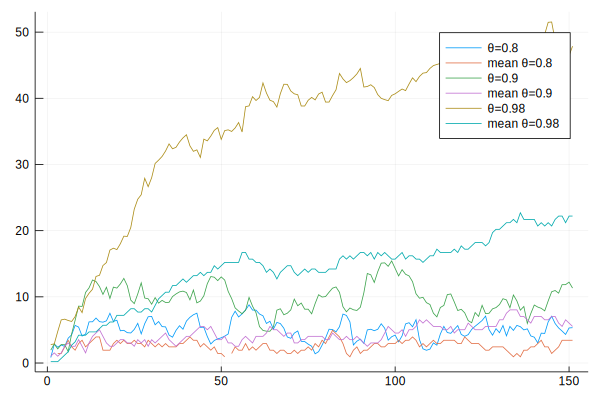

In [197]:
p=plot()
Θ=(0.8,0.9,0.98)
for θ in Θ
    plot!(p,f_ex2(θ)[1],label="θ=$θ")
    plot!(p,f_ex2(θ)[2],label="mean θ=$θ") 
end
p

* Histogram of the stationary distribution of the final $y^n_t$ by simulation N=200.

In [232]:
function finalpoint(θ;T=150,N=200,y0=0.0,γ=1.0,σ=1.0)
    final=zeros(N)
    for n in 1:N
        y=zeros(T+1)
        y[1]=γ+θ*y0+σ*randn()
        i=1
            while i<=T
            y[i+1]=γ+θ*y[i]+σ*randn()
             i+=1
            end
        final[n]=y[T]
    end
    return final
end

finalpoint (generic function with 1 method)

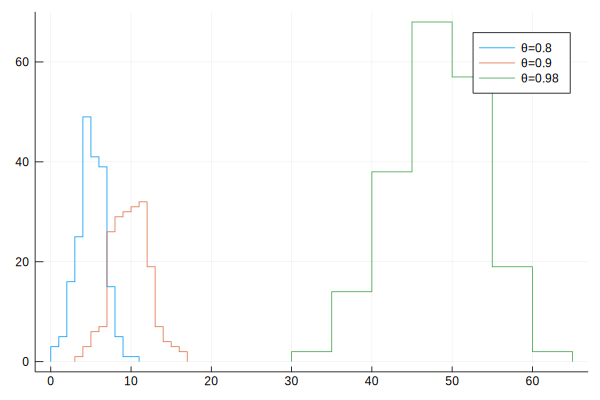

In [233]:
h=stephist()
Θ=(0.8,0.9,0.98)
for θ in Θ
    stephist!(h,finalpoint(θ),label="θ=$θ")
end
h

In [ ]:
for θ in Θ
    m=mean(finalpoint(θ))
    println("the mean is $m for θ=$θ")
end

In [277]:
for θ in Θ
    m=mean(finalpoint(θ))
    v=mean(finalpoint(θ).^2)-m^2
    println("the variance is $v for θ=$θ")
end


the variance is 4.37391003998631 for θ=0.8
the variance is 11.761475274853751 for θ=0.9
the variance is 28.67287862850708 for θ=0.98


**Note** Could be negative??

## Exercise 3: OLS

In [2]:
function dgp(x1,x2;a=0.1,b=0.2,c=0.5,d=1.0,σ=0.1,N=50)
    y=a*x1.+b*(x1.^2).+c*x2.+d*ones(N)+σ*randn(N)
    return y
end

dgp (generic function with 1 method)

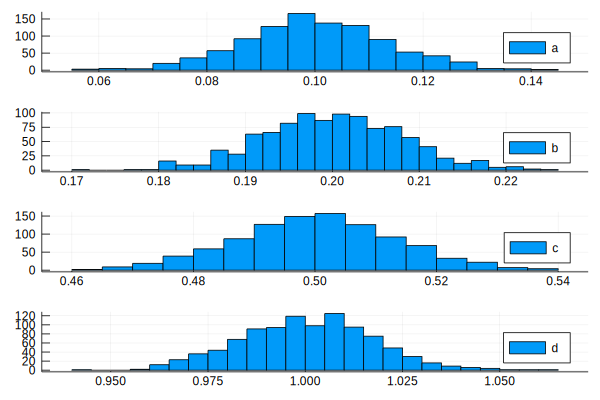

In [17]:
M,N=1000,50
x1,x2=randn(N),randn(N)
X=hcat(x1,x1.^2,x2,ones(N))
y=zeros(M,N)
βs=zeros(size(X)[2],M)
for m in 1:M
    y=dgp(x1,x2)
    βs[:,m]=(X'*X)\(X'*y)
end

a,b,c,d=βs[1,:],βs[2,:],βs[3,:],βs[4,:];

h_a=histogram(a,label="a")
h_b=histogram(b,label="b")
h_c=histogram(c,label="c")
h_d=histogram(d,label="d")

plot(h_a,h_b,h_c,h_d,layout=(4,1))

In [18]:
? histogram

search: histogram histogram! histogram2d histogram2d!



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
```


## Exercise 4

In [342]:
using NLsolve

In [343]:
? fixedpoint

search: fixedpoint compute_fixed_point



No documentation found.

`NLsolve.fixedpoint` is a `Function`.

```
# 1 method for generic function "fixedpoint":
[1] fixedpoint(f, initial_x::AbstractArray{T,N} where N; method, xtol, ftol, iterations, store_trace, show_trace, extended_trace, linesearch, factor, autoscale, m, beta, autodiff, inplace) where T in NLsolve at /Users/taisei/.julia/packages/NLsolve/ltuKE/src/nlsolve/fixedpoint.jl:22
```


In [345]:
# best style
using NLsolve


A = [0.8 -0.2; -0.1 0.7]
Σ = [0.5 0.4; 0.4 0.6]
s0=reshape(Σ*Σ',4)
f(S) = reshape(A * reshape(s0,2,2)* A' + Σ * Σ',4)
sol = fixedpoint(f,s0)
println("$(sol.iterations) iterations")

2 iterations
